# Компания «Работа с заботой». 
# HR-аналитика и МЛ

Задача построить модель, которая предсказывает уровень удовлетворённости сотрудника работой на основе предоставленных данных (1-я задача) и построить модель, которая предсказывает вероятность увольнения сотрудника из компании (2-я задача).

План выполнения:

**Загрузка данных:**

- Загрузить тренировочную выборку `train_job_satisfaction_rate.csv`, тестовые признаки `test_features.csv` и тестовые целевые значения `test_target_job_satisfaction_rate.csv`.

**Предобработка данных:**

- Изучить данные на наличие пропусков и аномалий.
- Устранить пропуски и преобразовать данные, чтобы их можно было использовать в моделях.

**Исследовательский анализ данных:**

- Проанализировать входные признаки, выявить их корреляцию с целевым признаком.
- Проверить важность каждого признака и их влияние на уровень удовлетворённости.

**Подготовка данных:**

- Создать пайплайн обработки данных.
- Закодировать категориальные признаки с использованием как минимум двух подходов (например, One-Hot Encoding и Ordinal Encoding).
- Нормализовать/стандартизировать числовые признаки.

**Обучение моделей:**

- Обучить как минимум две модели:
- Линейную модель (например, линейную регрессию).
- Модель дерева решений.
- Подобрать гиперпараметры одной из моделей (например, с помощью GridSearchCV или RandomizedSearchCV).
- Оценить модели по метрике SMAPE, стремясь к значению ≤15.

**Выводы:**

- Сравнить модели и выбрать лучшую, основываясь на значении SMAPE.
- Описать, почему выбранная модель оказалась лучше.


**Задача 2: Предсказание увольнения сотрудника**

**План выполнения**

**Загрузка данных:**

- Загрузить тренировочную выборку (train_quit.csv), тестовые признаки (test_features.csv) и тестовые целевые значения (test_target_quit.csv).

**Предобработка данных:**

- Изучить данные на наличие пропусков, аномалий, повторяющихся записей.
- Устранить проблемы с данными, если они есть, в пайплайне.

**Исследовательский анализ данных:**

- Провести EDA (Exploratory Data Analysis):
- Исследовать распределение признаков.
- Выявить «портрет» сотрудника, склонного к увольнению (например, отдел, зарплата, загруженность).

**Проверить гипотезу о связи уровня удовлетворённости (job_satisfaction_rate) с увольнением:**

- Построить визуализации для сравнения распределений job_satisfaction_rate между ушедшими и оставшимися сотрудниками.

**Добавление нового признака:**

- Использовать предсказанное значение job_satisfaction_rate из первой задачи как дополнительный признак.

**Подготовка данных:**

- Создать пайплайн для обработки данных, включая этапы кодирования признаков и заполнения пропусков.
- Закодировать категориальные признаки с использованием нескольких подходов.

**Обучение моделей:**

- Обучить как минимум три модели:
- Модель дерева решений (например, Random Forest).
- Логистическую регрессию.
- Любую другую модель (например, градиентный бустинг).
- Подобрать гиперпараметры для как минимум двух моделей.
- Оценить модели по метрике ROC-AUC, стремясь к значению ≥0.91.

**Выводы:**

- Сравнить модели, выбрав лучшую, и объяснить, почему она превосходит остальные.

**Общий вывод**


# Задача 1: предсказание уровня удовлетворённости сотрудника

## Загрузка данных

In [1]:
!pip install phik
!pip install shap
!pip install --upgrade scikit-learn

# Библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap
import phik


from sklearn.pipeline import Pipeline

# Преобразование данных
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (
    StandardScaler, 
    MinMaxScaler, 
    RobustScaler, 
    OneHotEncoder, 
    OrdinalEncoder, 
    LabelEncoder
)

# Обработка колонок
from sklearn.compose import ColumnTransformer

# Обработка пропусков
from sklearn.impute import SimpleImputer

# Метрики
from sklearn.metrics import (
    accuracy_score, 
    roc_auc_score, 
    f1_score,
    make_scorer,
    precision_score,
    recall_score
)

# Поиск гиперпараметров
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# Модели
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier


# Кросс-валидация
from sklearn.model_selection import cross_val_score

# Константы
RANDOM_STATE = 42
TEST_SIZE = 0.25

# Настройки для визуализации
plt.rcParams["figure.figsize"] = (14, 7)

import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module='sklearn.impute')
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn.neighbors")


In [2]:
# загрузка данных

try:
    train_js = pd.read_csv(
        'https://code.s3.yandex.net/datasets/train_job_satisfaction_rate.csv'
    )
    test_features = pd.read_csv(
        'https://code.s3.yandex.net/datasets/test_features.csv'
    )
    test_trgt_js = pd.read_csv(
        'https://code.s3.yandex.net/datasets/test_target_job_satisfaction_rate.csv'
    )
except:
    train_js = pd.read_csv('/datasets/train_job_satisfaction_rate.csv')
    test_features = pd.read_csv('/datasets/test_features.csv')
    test_trgt_js = pd.read_csv('/datasets/test_target_job_satisfaction_rate.csv')

In [3]:
# изучим данные

display(train_js.info())
display(train_js.head())
print('_'*111)
display(test_features.info())
display(test_features.head())
print('_'*111)
display(test_trgt_js.info())
display(test_trgt_js.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   dept                   3994 non-null   object 
 2   level                  3996 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   int64  
 5   last_year_promo        4000 non-null   object 
 6   last_year_violations   4000 non-null   object 
 7   supervisor_evaluation  4000 non-null   int64  
 8   salary                 4000 non-null   int64  
 9   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 312.6+ KB


None

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,155278,sales,junior,medium,2,no,no,1,24000,0.58
1,653870,hr,junior,high,2,no,no,5,38400,0.76
2,184592,sales,junior,low,1,no,no,2,12000,0.11
3,171431,technology,junior,low,4,no,no,2,18000,0.37
4,693419,hr,junior,medium,1,no,no,3,22800,0.20


_______________________________________________________________________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB


None

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800


_______________________________________________________________________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


None

,id,job_satisfaction_rate
0,130604,0.74
1,825977,0.75
2,418490,0.60
3,555320,0.72
4,826430,0.08


In [4]:
# установим id как индексы 

train_js = train_js.set_index('id')
test_features = test_features.set_index('id')
test_trgt_js = test_trgt_js.set_index('id')

**Вывод:**

- Данные в загруженных таблицах в целом соответствуют описанию.

- id обозначены как индексы в каждом датафрейме

**Имеются пропуски:** 

`train_js`
- dept имеет 6 пропусков.
- level имеет 4 пропуска.

`test_features`
- dept имеет 2 пропусков.
- level имеет 1 пропуска.

## Предобработка данных

In [5]:
# ищем дубликаты в тренировочной выборке, 
# в тестовой выборке мы не правомочны что либо удалять - эти данные поступают на вход обученной модели 
# и по ним должны быть сделаны "предсказания"

train_js.duplicated().sum()

245

In [6]:
# удалим дубликаты 
train_js = train_js.drop_duplicates()

train_js.shape

(3755, 9)

**Почему удалены дубликаты:**
- Повторяющиеся строки могли бы привести к "заучиванию" модели вместо выявления закономерностей.


In [7]:
# создадим пайплайн для обработки пропусков 

# для начала объеденим тестовые признаками с тестовым таргетом, чтобы совподало по ID. 
# пригодится в подготовке данных и обучении модели 

test_js = test_features.join(test_trgt_js, how="inner")

# разделеним на числовые и категориальные признаки

numerical_columns = [
    'employment_years', 
    'supervisor_evaluation', 
    'salary'
]
categorical_columns = [
    'dept', 'level', 'workload', 
    'last_year_promo', 'last_year_violations'
]

# создаем трансформеры для обработки данных где пропуски заменяются средним и модой (часто встречаемой)

numerical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='mean'))  
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent'))  # Пропуски заменяются модой
])

# комбинируем трансформеры в общий ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ]
)

train_processed = preprocessor.fit_transform(train_js)



**Вывод:**
- Найден дубликаты в тренировочной выборке, которые были удалены, чтобы в дальнейшем эт не привило к "заучиванию" модели вместо выявления закономерностей.

- неявных дубликатов найдено не было.

- устранены пропуски при помощи пайплайна, в категориальных признаках пропуски заменены на часто встречаемые, в случае если были пропуски в числовых они были бы заменены на среднее (таких не было).

## Исследовательский анализ данных

In [8]:
# преобразуем обработанные данные обратно в DataFrame для тренировочной выборки

train_js_df = pd.DataFrame(
    train_processed,
    columns=numerical_columns + categorical_columns,
    index=train_js.index
)

# добавим целевой признак для полноты EDA

train_js_df['job_satisfaction_rate'] = train_js['job_satisfaction_rate']

# преобразуем числовые данные в числовой формат

train_js_df[numerical_columns] = train_js_df[numerical_columns].astype(int)

# проверяем первые строки и структуру

display(train_js_df.info())
display(train_js_df.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3755 entries, 155278 to 338347
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   employment_years       3755 non-null   int64  
 1   supervisor_evaluation  3755 non-null   int64  
 2   salary                 3755 non-null   int64  
 3   dept                   3755 non-null   object 
 4   level                  3755 non-null   object 
 5   workload               3755 non-null   object 
 6   last_year_promo        3755 non-null   object 
 7   last_year_violations   3755 non-null   object 
 8   job_satisfaction_rate  3755 non-null   float64
dtypes: float64(1), int64(3), object(5)
memory usage: 293.4+ KB


None

,employment_years,supervisor_evaluation,salary,dept,level,workload,last_year_promo,last_year_violations,job_satisfaction_rate
id,,,,,,,,,
155278,2,1,24000,sales,junior,medium,no,no,0.58
653870,2,5,38400,hr,junior,high,no,no,0.76
184592,1,2,12000,sales,junior,low,no,no,0.11
171431,4,2,18000,technology,junior,low,no,no,0.37
693419,1,3,22800,hr,junior,medium,no,no,0.20


In [9]:
display(train_js_df.describe().T)
print('_' * 80)
display(train_js_df.describe(include=['object']).T)

,count,mean,std,min,25%,50%,75%,max
employment_years,3755.0,3.817044,2.557142,1.00,2.00,3.00,6.00,10.0
supervisor_evaluation,3755.0,3.463648,1.026265,1.00,3.00,4.00,4.00,5.0
salary,3755.0,34457.416778,15050.643870,12000.00,22800.00,31200.00,44400.00,98400.0
job_satisfaction_rate,3755.0,0.532554,0.226393,0.03,0.35,0.55,0.71,1.0


________________________________________________________________________________


,count,unique,top,freq
dept,3755,5,sales,1380
level,3755,3,junior,1703
workload,3755,3,medium,1908
last_year_promo,3755,2,no,3635
last_year_violations,3755,2,no,3202


Большинство сотрудников работают в отделе продаж на младших позициях, со стажем до 6 лет, средней нагрузкой и зарплатой около 34,500. Уровень удовлетворенности средний (0.53), большинство не получали повышения и не нарушали трудовой договор за последний год. Оценки руководителей в основном положительные (3–4 из 5).

In [10]:
#функция для построения гистограмм и диаграмм размаха для количественных признаков

def plot_box_and_hist(df, column, bins=10):
    """
    Создает диаграмму размаха и гистограмму для указанного количественного признака.

    Args:
        df: DataFrame с данными.
        column: Название столбца с количественным признаком.
        bins: Количество корзин для гистограммы. По умолчанию 10.

    Returns:
        None: Функция отображает графики, но ничего не возвращает.
    """
    fig, axes = plt.subplots(1, 2)  
    
    #диаграмма размаха
    
    axes[0].boxplot(df[column], patch_artist=True, boxprops=dict(facecolor='lightblue', color='black'))
    axes[0].set_title(f'Диаграмма размаха для {column}')
    axes[0].set_ylabel(column)
    axes[0].grid(True)
    
    #гистограмма
    
    axes[1].hist(df[column], bins=bins, color='skyblue', edgecolor='black')
    axes[1].set_title(f'Гистограмма для {column}')
    axes[1].set_xlabel(column)
    axes[1].set_ylabel('Частота')
    axes[1].grid(True)
    

    plt.tight_layout()
    plt.show()
               
        
#функция для построения столбчатых диаграмм для категориальных признаков

def plot_categorical_bars(df, columns):
    """
    Создает столбчатые диаграммы для указанных категориальных признаков.

    Args:
        df: DataFrame с данными.
        columns: Название столбца с категориальными признаками.

    Returns:
        None: Функция отображает графики, но ничего не возвращает.
    """
    for column in columns:
        plt.figure(figsize=(7, 5))
        df[column].value_counts().plot(kind='bar', color='darkgreen', edgecolor='black')
        plt.title(f'Распределение {column}')
        plt.xlabel(column)
        plt.ylabel('Частота')
        plt.grid(True)
        plt.show()
        
        
print(plot_box_and_hist.__doc__)
print('_' * 100)
print(plot_categorical_bars.__doc__)


    Создает диаграмму размаха и гистограмму для указанного количественного признака.

    Args:
        df: DataFrame с данными.
        column: Название столбца с количественным признаком.
        bins: Количество корзин для гистограммы. По умолчанию 10.

    Returns:
        None: Функция отображает графики, но ничего не возвращает.
    
____________________________________________________________________________________________________

    Создает столбчатые диаграммы для указанных категориальных признаков.

    Args:
        df: DataFrame с данными.
        columns: Название столбца с категориальными признаками.

    Returns:
        None: Функция отображает графики, но ничего не возвращает.
    


                                   Графики и диаграммы размаха для количественных признаков train_js_df

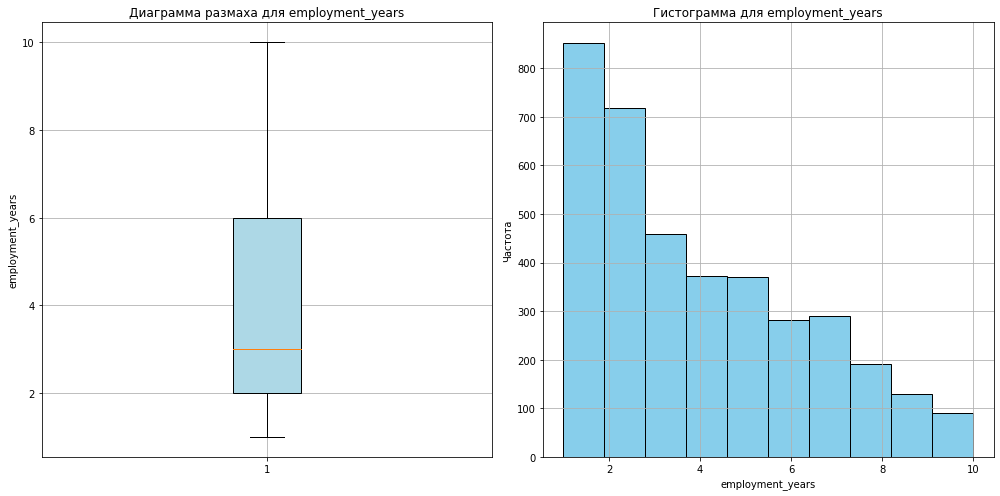

count    3755.000000
mean        3.817044
std         2.557142
min         1.000000
25%         2.000000
50%         3.000000
75%         6.000000
max        10.000000
Name: employment_years, dtype: float64

In [11]:
plot_box_and_hist(train_js_df, 'employment_years')
train_js_df['employment_years'].describe()

Основная часть сотрудников компании имеет стаж работы до 2 лет (более 800 человек). Медианное значение стажа составляет 3 года, а максимальный показатель достигает 10 лет, что указывает на присутствие долгосрочных сотрудников.

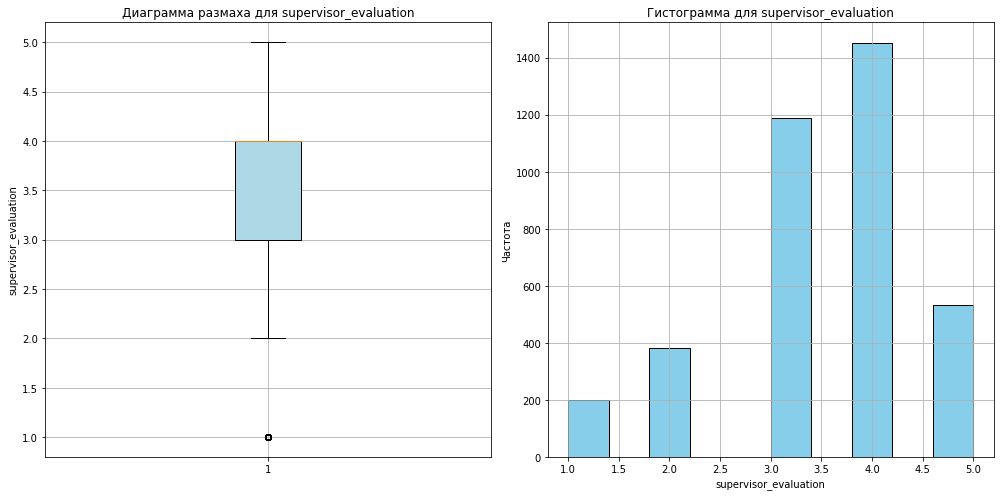

count    3755.000000
mean        3.463648
std         1.026265
min         1.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: supervisor_evaluation, dtype: float64

In [12]:
plot_box_and_hist(train_js_df, 'supervisor_evaluation')
train_js_df['supervisor_evaluation'].describe()

Распределение оценок работы сотрудниками руководителями сосредоточено в диапазоне от 3 до 4, что соответствует основным перцентилям данных. Минимальная оценка 1 встречается крайне редко

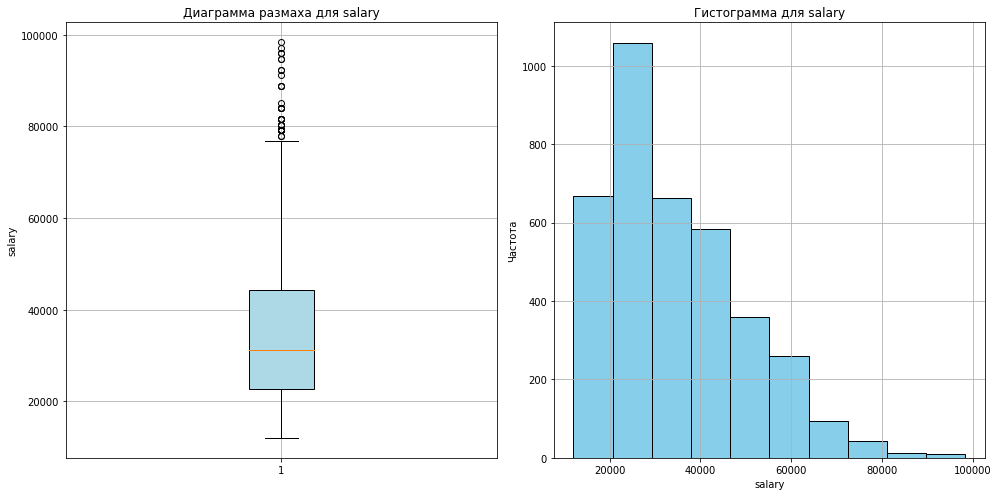

count     3755.000000
mean     34457.416778
std      15050.643870
min      12000.000000
25%      22800.000000
50%      31200.000000
75%      44400.000000
max      98400.000000
Name: salary, dtype: float64

In [13]:
plot_box_and_hist(train_js_df, 'salary')
train_js_df['salary'].describe()

Большинство сотрудников компании имеют зарплаты в диапазоне от 20,000 до 40,000, с медианным значением 31,200. Основной диапазон сосредоточен между 22,800 и 44,400. Присутствуют выбросы, превышающие 80,000, что свидетельствует о наличии высокооплачиваемых сотрудников.

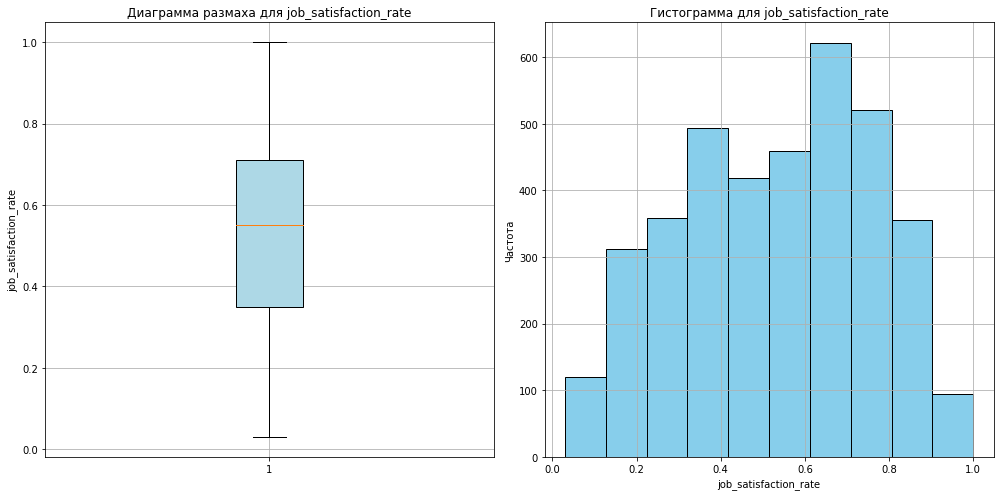

count    3755.000000
mean        0.532554
std         0.226393
min         0.030000
25%         0.350000
50%         0.550000
75%         0.710000
max         1.000000
Name: job_satisfaction_rate, dtype: float64

In [14]:
plot_box_and_hist(train_js_df, 'job_satisfaction_rate')
train_js_df['job_satisfaction_rate'].describe()

Уровень удовлетворённости сотрудников варьируется от 0.03 до 1.0 с медианным значением 0.55. Основной уровень удовлетворённости в диапазоне от 0.35 до 0.71. Гистограмма показывает почти симметричное распределение, где наиболее частое значение около 0.6

                                   Графики для категориальных признаков train_js_df

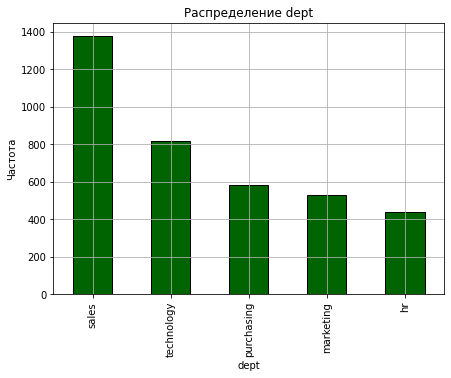

count      3755
unique        5
top       sales
freq       1380
Name: dept, dtype: object

In [15]:
plot_categorical_bars(train_js_df, ['dept'])
train_js_df['dept'].describe()

Большинство сотрудников работают в отделе продаж (`sales`). Отделы `technology` и `purchasing` также имеют значительное количество сотрудников, а `marketing` и `hr` включают меньше всего.

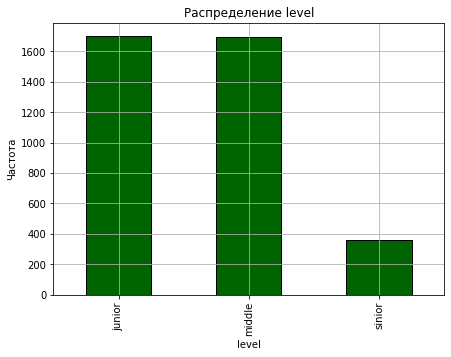

count       3755
unique         3
top       junior
freq        1703
Name: level, dtype: object

In [16]:
plot_categorical_bars(train_js_df, ['level'])
train_js_df['level'].describe()

Большинство сотрудников занимают должности начального (junior) и среднего (middle) уровней

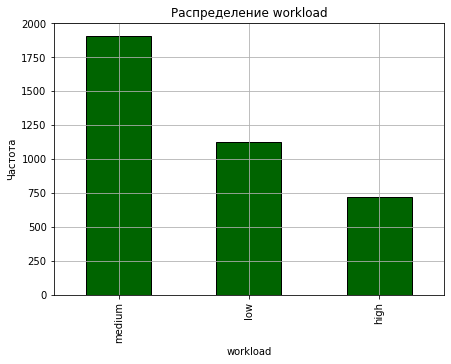

count       3755
unique         3
top       medium
freq        1908
Name: workload, dtype: object

In [17]:
plot_categorical_bars(train_js_df, ['workload'])
train_js_df['workload'].describe()

У большинства сотрудников средняя загруженность, имеются более 700 сотрудников с высокой загруженностью, а также более 1000 сотрудников с низкой. 

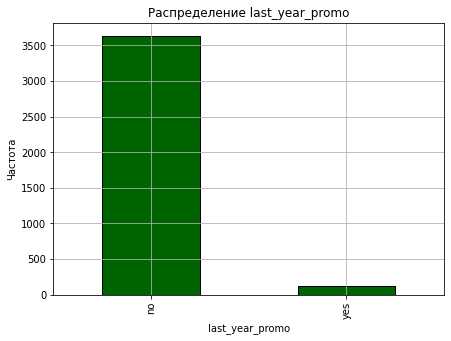

count     3755
unique       2
top         no
freq      3635
Name: last_year_promo, dtype: object

In [18]:
plot_categorical_bars(train_js_df, ['last_year_promo'])
train_js_df['last_year_promo'].describe()

Повышение за последний год было доступно лишь небольшой части сотрудников (около 3.2%). Большинство сотрудников (96.8%) не получали повышения

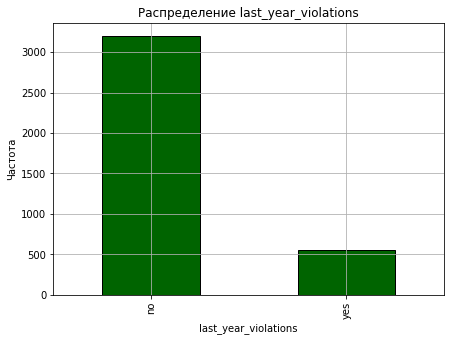

count     3755
unique       2
top         no
freq      3202
Name: last_year_violations, dtype: object

In [19]:
plot_categorical_bars(train_js_df, ['last_year_violations'])
train_js_df['last_year_violations'].describe()

Нарушения за последний год наблюдаются у небольшой части сотрудников (около 14.7%). Большинство сотрудников (85.3%) не нарушали правила компании. 

**Общая характеристика сотрудников:**
- **Отделы:** Большинство сотрудников работают в отделе продаж (sales), за ним следуют technology и purchasing. Отделы marketing и hr включают меньше всего сотрудников.
- **Уровень должностей:** Основная часть сотрудников занимает начальные (junior) и средние (middle) позиции. Уровень senior встречается реже.
- **Стаж работы:**
Большинство сотрудников имеют стаж работы до 2 лет (более 800 человек).
Медианное значение стажа — 3 года, максимальное — 10 лет, что свидетельствует о наличии долгосрочных сотрудников.
- **Нагрузка:** Более 700 сотрудников имеют высокую загруженность, а свыше 1000 — низкую загруженность. Средняя загруженность встречается чаще всего.


**Финансовые показатели:**

- **Зарплата:**
Большинство сотрудников получают зарплаты в диапазоне от 20,000 до 40,000 с медианным значением 31,200.
Основной диапазон зарплат — от 22,800 до 44,400.
Присутствуют высокие зарплаты (выше 80,000), что свидетельствует о наличии высокооплачиваемых сотрудников.
**Удовлетворённость и оценки:**
- **Удовлетворённость:**
Уровень удовлетворённости варьируется от 0.03 до 1.0 с медианным значением 0.55.
Основной уровень удовлетворённости — от 0.35 до 0.71. Наиболее частое значение — около 0.6, что говорит о средней удовлетворённости большинства сотрудников.
- **Оценки руководителей:**
Основная часть оценок сосредоточена в диапазоне от 3 до 4, минимальная оценка 1 встречается крайне редко.

**Повышения и нарушения:**

- **Повышение за последний год:**
Лишь 3.2% сотрудников получали повышение, а 96.8% — нет.
- **Нарушения:**
Нарушения за последний год были у 14.7% сотрудников, а большинство (85.3%) не нарушали правила компании.

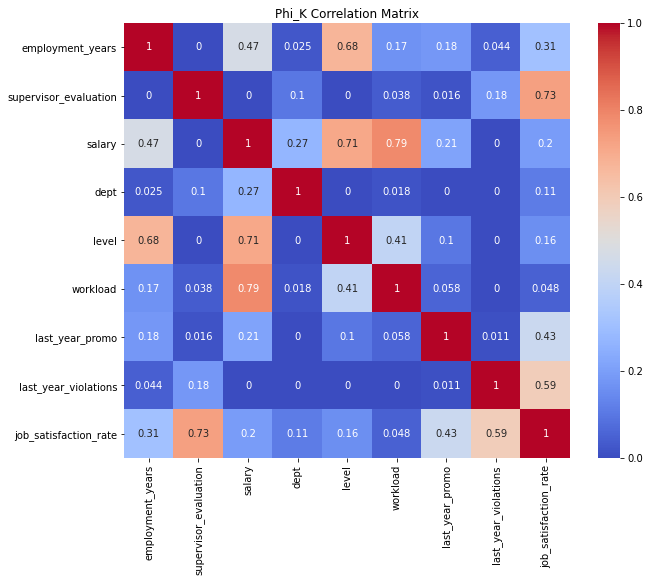

In [20]:
#Phi_K correlation

corr_matrix = train_js_df.phik_matrix(
    interval_cols=['employment_years', 
    'supervisor_evaluation', 
    'salary']
)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Phi_K Correlation Matrix')
plt.show()

Наибольшая связь с `удовлетворённостью` наблюдается у `оценки руководителя` (0.73), а также у фактов `повышения за последний год` (0.43) и `нарушений трудового договора` (0.59). `Зарплата, стаж, уровень должности и нагрузка` влияют слабее. Это значит, что ключевыми факторами для удовлетворённости являются отношение руководителя к сотруднику и события последнего года (повышения, нарушения).


Взаимосвязи между остальными признаками:
Наблюдается сильная корреляция между `salary` и `workload` (0.79), а также между `salary` и `leve`l (0.71). 
`employment_years тесно` связаны с `level` (0.68), что отражает закономерность: чем дольше человек работает в компании, тем, как правило, выше его должностной уровень.


## Подготовка данных

**Подготовку признаков выполните в пайплайне, дополнив пайплайн шагом предобработки. При кодировании учитывайте особенности признаков и моделей и используйте как минимум два кодировщика.**

In [21]:
# Подготовка данных 

X_train = train_js_df.copy()
X_train = train_js_df.drop('job_satisfaction_rate', axis=1)
y_train = train_js_df['job_satisfaction_rate']


# Обновление тестовых данных
X_test = test_js.copy()
X_test = test_js.drop('job_satisfaction_rate', axis=1)
y_test = test_js['job_satisfaction_rate']

In [22]:
display(X_train.head())
display(X_test.head())

,employment_years,supervisor_evaluation,salary,dept,level,workload,last_year_promo,last_year_violations
id,,,,,,,,
155278,2,1,24000,sales,junior,medium,no,no
653870,2,5,38400,hr,junior,high,no,no
184592,1,2,12000,sales,junior,low,no,no
171431,4,2,18000,technology,junior,low,no,no
693419,1,3,22800,hr,junior,medium,no,no


,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
id,,,,,,,,
485046,marketing,junior,medium,2,no,no,5,28800
686555,hr,junior,medium,1,no,no,4,30000
467458,sales,middle,low,5,no,no,4,19200
418655,sales,middle,low,6,no,no,4,19200
789145,hr,middle,medium,5,no,no,5,40800


In [23]:
# создаём списки с названиями признаков

num_columns = [
    'employment_years', 
    'supervisor_evaluation', 
    'salary'
]
ohe_columns = [
     'last_year_promo', 'last_year_violations', 'dept'
]

ord_columns = [
    'level', 'workload'
]

In [24]:
# Создаём пайплайн для подготовки признаков из списка ohe_columns

ohe_pipe = Pipeline(
    [
        ('simpleImputer_ohe_1', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
        ('simpleImputer_ohe_2', SimpleImputer(missing_values=' ', strategy='most_frequent')),
        ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore'))
    ]
)

# Создаём пайплайн для подготовки признаков из списка ord_columns

ord_pipe = Pipeline(
    [
        ('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
        ('ord', OrdinalEncoder(
            categories=[
                ['medium', 'high', 'low'],
                ['junior', 'middle', 'sinior'],
            ],
            handle_unknown='use_encoded_value', unknown_value=np.nan
        )), 
        ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)

# Общий пайплайн для подготовки данных

data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_columns),
        ('ord', ord_pipe, ord_columns),
        ('num', StandardScaler(), num_columns)
    ], 
    remainder='passthrough'
)

##  Обучение моделей

**Обучите как минимум две модели. Возьмите одну линейную модель, а в качестве второй — дерево решений. Подберите гиперпараметры как минимум для одной модели с помощью одного из известных вам инструментов.**

**Выберите лучшую модель и проверьте её качество. Выбор делайте на основе новой метрики — SMAPE (англ. symmetric mean absolute percentage error, «симметричное среднее абсолютное процентное отклонение»).**

**Напишите функцию, которая принимает на вход массивы NumPy или объекты Series в pandas и возвращает значение метрики SMAPE. Используйте эту метрику при подборе гиперпараметров и оценке качества моделей.**

**В решении сохраните работу со всеми моделями, которые вы пробовали. Сделайте выводы.**

In [25]:
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('model', DecisionTreeRegressor(random_state=RANDOM_STATE))
])

In [26]:
param_grid = [
    # DecisionTreeRegressor
    {
        'model': [DecisionTreeRegressor(random_state=RANDOM_STATE)],
        'model__max_depth': range(2, 11),
        'model__min_samples_split': range(2, 11),
        'model__min_samples_leaf': range(1, 11),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']
    },
    # LinearRegression
    {
        'model': [LinearRegression()],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']
    },
    # RandomForestRegressor
    {
        'model': [RandomForestRegressor(random_state=RANDOM_STATE)],
        'model__n_estimators': range(50, 201, 50),
        'model__max_depth': range(5, 21, 5),
        'model__min_samples_split': range(2, 11),
        'model__min_samples_leaf': range(1, 11),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']
    }
]

In [27]:
# Метрика SMAPE

def smape(y_true, y_pred):
    return 1/len(y_true) * np.sum(2*np.abs(y_pred - y_true)/(np.abs(y_true) + np.abs(y_pred))*100)

scorer = make_scorer(smape, greater_is_better=False)


In [28]:
randomized_search = RandomizedSearchCV(
    pipe_final,
    param_grid,
    scoring=scorer,
    cv=5,
    random_state=RANDOM_STATE,
    n_jobs=-1,
)

# Обучение моделей
randomized_search.fit(X_train, y_train)

# Лучшая модель
best_model = randomized_search.best_estimator_
best_params = randomized_search.best_params_
best_smape = -randomized_search.best_score_

# Оценка на тестовой выборке
y_pred = best_model.predict(X_test)
test_smape = smape(y_test, y_pred)

print(f"Лучшие параметры модели: {best_params}")
print(f"SMAPE на тестовой выборке: {test_smape}")

/opt/conda/lib/python3.9/site-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: [0 1]. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: [0 1]. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: [0 1]. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: [0 1]. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklea

Лучшие параметры модели: {'preprocessor__num': MinMaxScaler(), 'model__n_estimators': 200, 'model__min_samples_split': 10, 'model__min_samples_leaf': 1, 'model__max_depth': 15, 'model': RandomForestRegressor(random_state=42)}
SMAPE на тестовой выборке: 14.84372659599182


/opt/conda/lib/python3.9/site-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: [0 1]. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(


## Оформление выводов

**Сделайте промежуточные выводы о том, какая модель справилась лучше и почему.**

**Промежуточные выводы о моделях**

Модель RandomForestRegressor показала лучшие результаты на тестовой выборке, достигнув значения SMAPE = 14.84, что соответствует критерию успеха (≤ 15).

Успех RandomForestRegressor объясняется его способностью объединять предсказания множества деревьев решений, что уменьшает влияние шума и выбросов, а также обеспечивает высокую гибкость при работе с разными типами зависимостей. 

# Задача 2: предсказание увольнения сотрудника из компании

## Загрузка данных

In [29]:
# загрузка данных

try:
    train_q = pd.read_csv(
        'https://code.s3.yandex.net/datasets/train_quit.csv'
    )
    test_features_q = pd.read_csv(
        'https://code.s3.yandex.net/datasets/test_features.csv'
    )
    test_trgt_q = pd.read_csv(
        'https://code.s3.yandex.net/datasets/test_target_quit.csv.csv'
    )
except:
    train_q = pd.read_csv('/datasets/train_quit.csv')
    test_features_q = pd.read_csv('/datasets/test_features.csv')
    test_trgt_q = pd.read_csv('/datasets/test_target_quit.csv')

In [30]:
# изучим данные

display(train_q.info())
display(train_q.head())
print('_'*111)
display(test_features_q.info())
display(test_features_q.head())
print('_'*111)
display(test_trgt_q.info())
display(test_trgt_q.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     4000 non-null   int64 
 1   dept                   4000 non-null   object
 2   level                  4000 non-null   object
 3   workload               4000 non-null   object
 4   employment_years       4000 non-null   int64 
 5   last_year_promo        4000 non-null   object
 6   last_year_violations   4000 non-null   object
 7   supervisor_evaluation  4000 non-null   int64 
 8   salary                 4000 non-null   int64 
 9   quit                   4000 non-null   object
dtypes: int64(4), object(6)
memory usage: 312.6+ KB


None

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
0,723290,sales,middle,high,2,no,no,4,54000,no
1,814010,sales,junior,medium,2,no,no,4,27600,no
2,155091,purchasing,middle,medium,5,no,no,1,37200,no
3,257132,sales,junior,medium,2,no,yes,3,24000,yes
4,910140,marketing,junior,medium,2,no,no,5,25200,no


_______________________________________________________________________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB


None

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800


_______________________________________________________________________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2000 non-null   int64 
 1   quit    2000 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


None

,id,quit
0,999029,yes
1,372846,no
2,726767,no
3,490105,no
4,416898,yes


In [31]:
# установим id как индексы 

train_q = train_q.set_index('id')
test_features_q = test_features_q.set_index('id')
test_trgt_q = test_trgt_q.set_index('id')

In [32]:
# объеденим по id тестовые выборку для дальнейшего использования

test_q = test_features_q.join(test_trgt_q, how="inner")

## Предобработка данных

**Изучите данные и при необходимости выполните предобработку. Если есть пропуски, заполните их в пайплайне.**

In [33]:
# ищем дубликаты в тренировочной выборке, 
# в тестовой выборке мы не правомочны что либо удалять - эти данные поступают на вход обученной модели 
# и по ним должны быть сделаны "предсказания"

display(train_q.duplicated().sum())
display(train_q.shape)

1413

(4000, 9)

In [34]:
# удалим дубликаты 

train_q = train_q.drop_duplicates()
train_q.shape

(2587, 9)

Почему удалены дубликаты:

Повторяющиеся строки могли бы привести к "заучиванию" модели вместо выявления закономерностей.

In [35]:
train_q.isna().sum()

dept                     0
level                    0
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
quit                     0
dtype: int64

**Вывод:**
- Найден дубликаты в тренировочной выборке, которые были удалены, чтобы в дальнейшем эт не привило к "заучиванию" модели вместо выявления закономерностей.

- неявных дубликатов найдено не было.

- пропусков не обнаружено

## Исследовательский анализ данных

### Проведите исследовательский анализ данных.


In [36]:
display(train_q.describe().T)
print('_' * 80)
display(train_q.describe(include=['object']).T)

,count,mean,std,min,25%,50%,75%,max
employment_years,2587.0,4.213375,2.601105,1.0,2.0,4.0,6.0,10.0
supervisor_evaluation,2587.0,3.367994,1.080243,1.0,3.0,3.0,4.0,5.0
salary,2587.0,37107.692308,16267.354906,12000.0,24000.0,33600.0,46800.0,96000.0


________________________________________________________________________________


,count,unique,top,freq
dept,2587,5,sales,805
level,2587,3,middle,1282
workload,2587,3,medium,1244
last_year_promo,2587,2,no,2476
last_year_violations,2587,2,no,2111
quit,2587,2,no,1932


**Большинство сотрудников:**
- Работают в отделе продаж (sales) на среднем уровне должностей (middle), со стажем работы до 6 лет (медиана — 4 года) и средней загрузкой (medium). 
- Не получали повышения за последний год (2476 из 2587, более 95%);
- Не нарушали трудовой договор (2111 из 2587, около 82%);
- Не увольнялись (1932 из 2587, около 75%).

**Зарплата:**
- Средняя зарплата составляет 37,108, а медиана — 33,600, при этом большинство зарплат укладывается в диапазон от 24,000 до 46,800.

**Оценка**
- Руководители чаще всего оценивают сотрудников положительно: медианная оценка — 3 (по шкале от 1 до 5), большинство сотрудников получают оценки от 3 до 4.

                       Графики и диаграммы размаха для количественных признаков train_q

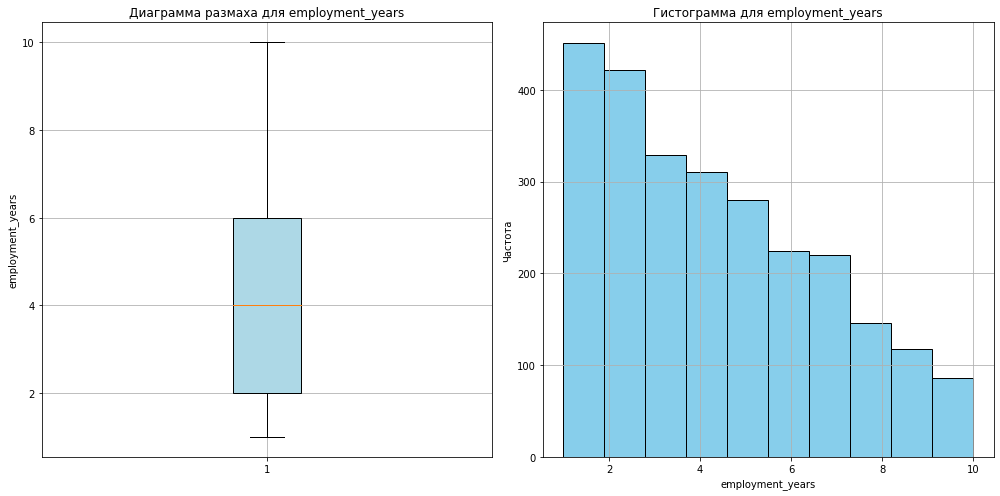

count    2587.000000
mean        4.213375
std         2.601105
min         1.000000
25%         2.000000
50%         4.000000
75%         6.000000
max        10.000000
Name: employment_years, dtype: float64

In [37]:
plot_box_and_hist(train_q, 'employment_years')
train_q['employment_years'].describe()

Стаж сотрудников в компании варьируется от 1 до 10 лет с медианным значением 4 года. Основная часть сотрудников имеет стаж работы в диапазоне от 2 до 6 лет. Гистограмма показывает убывающее распределение, где большинство сотрудников имеют стаж 2–4 года, а с увеличением стажа число сотрудников снижается.

Диаграмма размаха подтверждает, что разброс данных умеренный, выбросов в данных не обнаружено, что указывает на однородность распределения стажа.

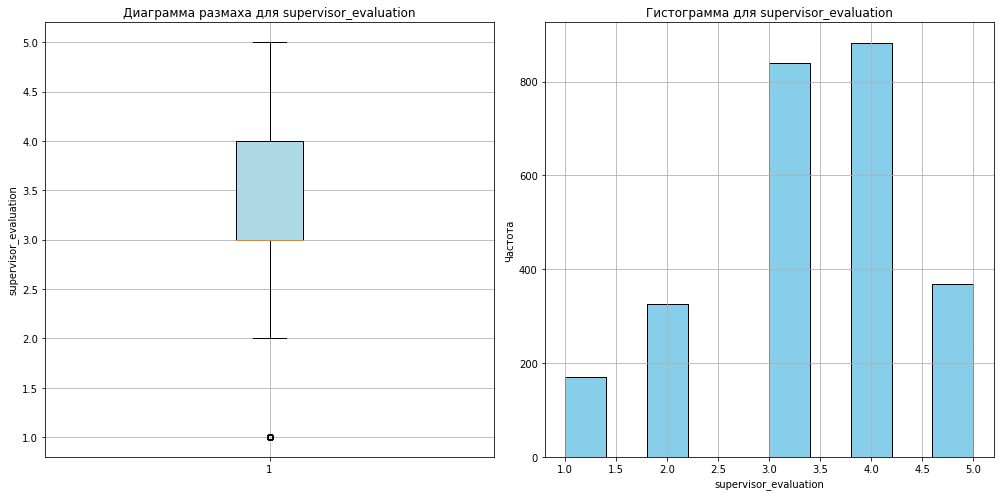

count    2587.000000
mean        3.367994
std         1.080243
min         1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: supervisor_evaluation, dtype: float64

In [38]:
plot_box_and_hist(train_q, 'supervisor_evaluation')
train_q['supervisor_evaluation'].describe()

Оценки сотрудников руководителями варьируются от 1 до 5, с медианным значением 3. Основная часть сотрудников получает оценки в диапазоне от 3 до 4, что видно из гистограммы — это наиболее частые значения. Средняя оценка составляет 3.37, а стандартное отклонение — 1.08, что говорит о некоторой вариативности в оценивании.

Диаграмма размаха показывает наличие низких оценок (единиц), которые можно рассматривать как потенциальные выбросы.

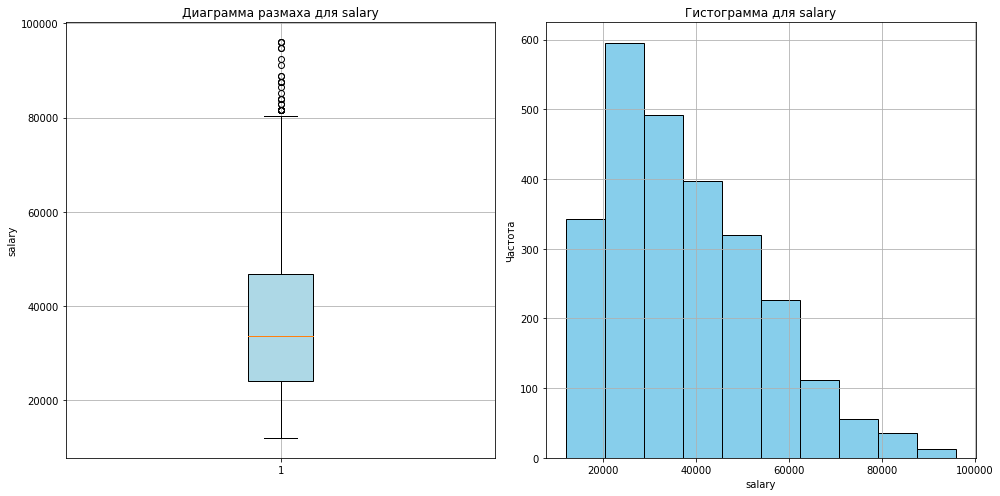

count     2587.000000
mean     37107.692308
std      16267.354906
min      12000.000000
25%      24000.000000
50%      33600.000000
75%      46800.000000
max      96000.000000
Name: salary, dtype: float64

In [39]:
plot_box_and_hist(train_q, 'salary')
train_q['salary'].describe()

Зарплата сотрудников варьируется от 12,000 до 96,000 с медианным значением 33,600. Основной диапазон зарплат составляет от 24,000 до 46,800, а наиболее частое значение около 30,000–35,000. Диаграмма размаха указывает на наличие выбросов с зарплатами выше 80,000.

                                   Графики для категориальных признаков train_q

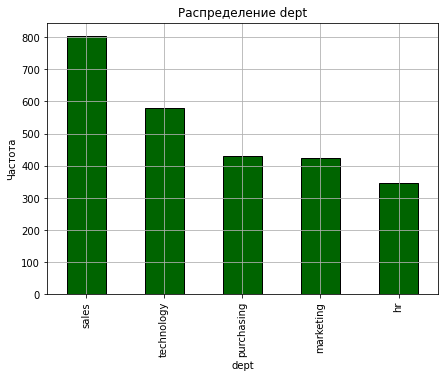

count      2587
unique        5
top       sales
freq        805
Name: dept, dtype: object

In [40]:
plot_categorical_bars(train_q, ['dept'])
train_q['dept'].describe()

Большинство сотрудников работают в отделе sales (805 из 2587). На втором месте — отдел technology, который включает значительное число сотрудников. Остальные отделы, такие как purchasing, marketing и hr, имеют примерно одинаковую численность сотрудников. 

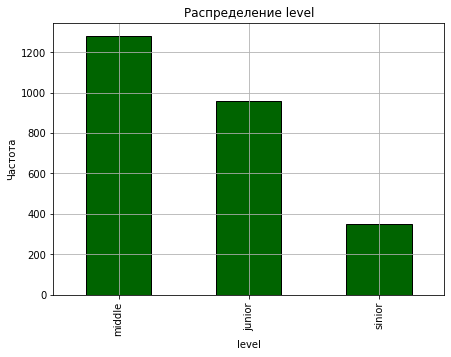

count       2587
unique         3
top       middle
freq        1282
Name: level, dtype: object

In [41]:
plot_categorical_bars(train_q, ['level'])
train_q['level'].describe()

Большинство сотрудников работают в позиции middle 

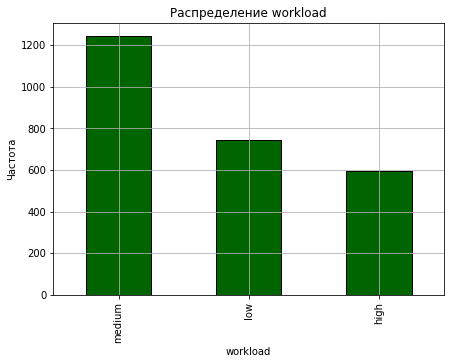

count       2587
unique         3
top       medium
freq        1244
Name: workload, dtype: object

In [42]:
plot_categorical_bars(train_q, ['workload'])
train_q['workload'].describe()

Большинство сотрудников имеют среднюю загруженность

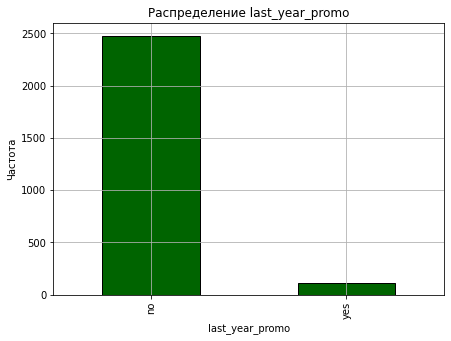

count     2587
unique       2
top         no
freq      2476
Name: last_year_promo, dtype: object

In [43]:
plot_categorical_bars(train_q, ['last_year_promo'])
train_q['last_year_promo'].describe()

Большинство сотрудников не получали повышения за последний год

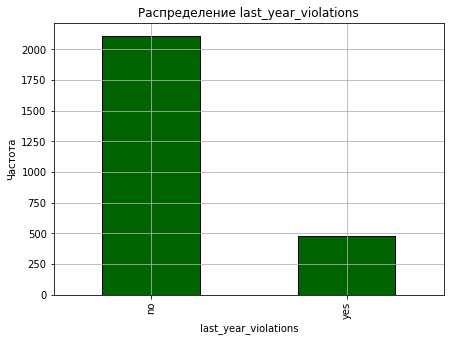

count     2587
unique       2
top         no
freq      2111
Name: last_year_violations, dtype: object

In [44]:
plot_categorical_bars(train_q, ['last_year_violations'])
train_q['last_year_violations'].describe()

Большинство сотрудников не нарушали трудовой договор за последний год

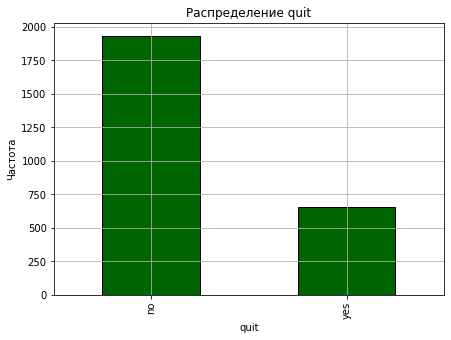

count     2587
unique       2
top         no
freq      1932
Name: quit, dtype: object

In [45]:
plot_categorical_bars(train_q, ['quit'])
train_q['quit'].describe()

Большинство сотрудников не увольнялись из компании . Четверть от общего числа сотрудников покинуло компанию. 

Данные показывают, что большинство сотрудников работают в стабильных условиях, с умеренной загрузкой, средним уровнем оплаты труда и хорошей дисциплиной. Основные выводы:

**Позиции и отделы:**
- Наибольшее число сотрудников сосредоточено в отделе продаж (sales), на среднем уровне должностей (middle) и с средней загрузкой (medium).
- Другие отделы, такие как technology, purchasing, marketing и hr, имеют меньшую численность, но сохраняют баланс между собой.

**Стаж работы:**
- Стаж сотрудников варьируется от 1 до 10 лет, с медианным значением 4 года.
- Основная часть сотрудников имеет стаж в диапазоне 2–6 лет, что отражает преобладание среднего уровня опыта.

**Зарплаты:**
- Средняя зарплата составляет 37,108, медианная — 33,600, а основная часть находится в диапазоне 24,000–46,800.
- Выбросы в зарплатах выше 80,000 указывают на наличие небольшого числа сотрудников с высокими доходами.

**Оценки руководителей:**
- Руководители в целом оценивают сотрудников положительно: медианная оценка — 3, большинство получает оценки 3–4.
- Распределение оценок показывает умеренную вариативность с редкими низкими оценками.

**Дисциплина и мотивация:**
- Более 95% сотрудников не получали повышения за последний год, что может указывать на строгие требования или низкую мотивацию.
- 82% сотрудников не нарушали трудовой договор за последний год, что свидетельствует о высокой дисциплине.

**Увольнения:**
- Большинство сотрудников (75%) остаются в компании, однако 25% покинули её, что может быть показателем естественной текучести кадров.

### Составьте портрет «уволившегося сотрудника». Например, можно узнать, в каком отделе с большей вероятностью работает уволившийся сотрудник и какой у него уровень загруженности. Также можно сравнить среднее значение зарплаты ушедших сотрудников с теми, кто остался в компании.


In [46]:
print(
    f"Уровень увольнений по отделам: "
    f"{train_q.groupby('dept')['quit'].apply(lambda x: (x == 'yes').mean() * 100).round(2)}"
)

Уровень увольнений по отделам: dept
hr            23.56
marketing     26.48
purchasing    27.91
sales         23.73
technology    25.82
Name: quit, dtype: float64


In [47]:
print(
    f"Уровень увольнений по уровню загруженности: "
    f"{train_q.groupby('workload')['quit'].apply(lambda x: (x == 'yes').mean() * 100).round(2)}"
)

Уровень увольнений по уровню загруженности: workload
high      18.26
low       39.01
medium    20.50
Name: quit, dtype: float64


In [48]:
print(
    f"Средняя зарплата в зависимости от статуса увольнения: "
    f"{train_q.groupby('quit')['salary'].mean().round(2)}"
)

Средняя зарплата в зависимости от статуса увольнения: quit
no     40952.17
yes    25767.94
Name: salary, dtype: float64


**Уровень увольнений по отделам:**
- Выявлены отделы, где процент увольнений выше. purchasing, marketing. В основном нету выбивающихся направлений от общей массы.

**Уровень увольнений по загруженности:**
- Сотрудники с низкой загруженностью имеют самый высокий уровень увольнений. 
- Сотрудники с высокой загруженностью, напротив, увольняются реже, что, возможно, связано с более активным вовлечением в рабочие процессы.

**Средняя зарплата в зависимости от статуса увольнения:**
- Сотрудники, которые увольняются, в среднем получают существенно меньшую зарплату по сравнению с теми, кто остается. 

### Аналитики утверждают, что уровень удовлетворённости сотрудника работой в компании влияет на то, уволится ли сотрудник. Проверьте это утверждение: визуализируйте и сравните распределения признака job_satisfaction_rate для ушедших и оставшихся сотрудников. Используйте данные с обоими целевыми признаками тестовой выборки.

In [49]:
# Объединение данных с использованием индекса

test_q = test_q.merge(
    test_js[['job_satisfaction_rate']], 
    left_index=True, 
    right_index=True, 
    how='inner'
)


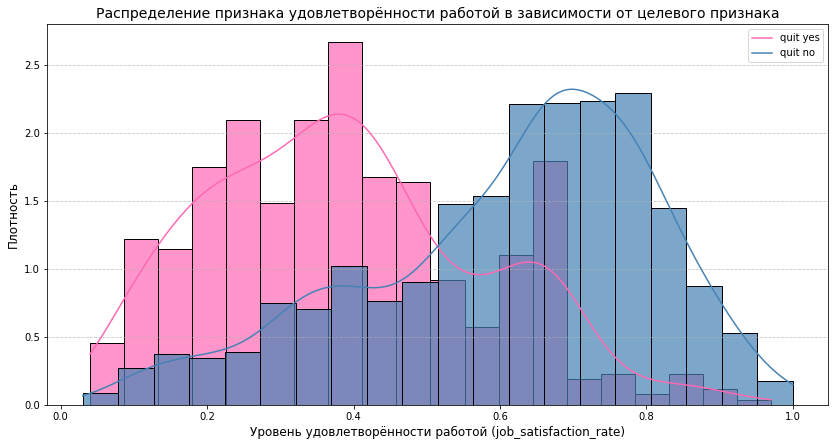

In [50]:
sns.histplot(
    test_q[test_q['quit'] == 'yes']['job_satisfaction_rate'], 
    kde=True, stat='density', color='#FF69B4', label='quit yes', bins=20, alpha=0.7
)
sns.histplot(
    test_q[test_q['quit'] == 'no']['job_satisfaction_rate'], 
    kde=True, stat='density', color='#4682B4', label='quit no', bins=20, alpha=0.7
)

# Настройки графика
plt.title('Распределение признака удовлетворённости работой в зависимости от целевого признака', fontsize=14)
plt.xlabel('Уровень удовлетворённости работой (job_satisfaction_rate)', fontsize=12)
plt.ylabel('Плотность', fontsize=12)
plt.legend(['quit yes', 'quit no'])
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Отображение графика
plt.show()

**Распределение уволившихся сотрудников (розовый график):**
- Большинство сотрудников, которые уволились, имели низкий уровень удовлетворённости работой.
- Основная масса значений находится в диапазоне 0.1–0.4.
- Практически нет сотрудников, которые увольнялись с высокой удовлетворённостью (близкой к 1.0).

**Распределение оставшихся сотрудников (синий график):**
- Сотрудники, которые остались, в основном имеют средний и высокий уровень удовлетворённости.
- Основной пик приходится на диапазон 0.6–0.9.
- Очень мало сотрудников с удовлетворённостью ниже 0.4, которые остались.

**Пересечение графиков:**
- Есть небольшое пересечение между сотрудниками, у которых уровень удовлетворённости в диапазоне 0.4–0.5.
Это может свидетельствовать о том, что уровень удовлетворённости в этом диапазоне является критическим: такие сотрудники либо остаются, либо увольняются в зависимости от дополнительных факторов.

## Добавление нового входного признака

**Допустим, job_satisfaction_rate и quit действительно связаны и вы получили необходимое значение метрики в первой задаче. Тогда добавьте job_satisfaction_rate, предсказанный лучшей моделью первой задачи, к входным признакам второй задачи.**

In [51]:
# Удаление целевого признака перед предсказаниями, а также удаления 'job_satisfaction_rate'
# с тестовых данных, который мы добавляли для распределения признака 
# для ушедших и оставшихся сотрудников. 

test_q = test_q.drop(columns=['job_satisfaction_rate'])
train_features_task2 = train_q.drop(columns=['quit'])
test_features_task2 = test_q.drop(columns=['quit'])

In [52]:
# Добавление предсказанного признака в данные задачи 2

train_q['predicted_job_satisfaction_rate'] = best_model.predict(train_features_task2)
test_q['predicted_job_satisfaction_rate'] = best_model.predict(test_features_task2)

# Сохраняем обновлённые данные

train_q.to_csv('train_quit_with_predictions.csv', index=False)
test_q.to_csv('test_quit_with_predictions.csv', index=False)

# Проверяем результат

display(train_q.head())
display(test_q.head())

/opt/conda/lib/python3.9/site-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: [0 1]. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: [0 1]. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(


,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit,predicted_job_satisfaction_rate
id,,,,,,,,,,
723290,sales,middle,high,2,no,no,4,54000,no,0.629386
814010,sales,junior,medium,2,no,no,4,27600,no,0.841353
155091,purchasing,middle,medium,5,no,no,1,37200,no,0.411444
257132,sales,junior,medium,2,no,yes,3,24000,yes,0.323736
910140,marketing,junior,medium,2,no,no,5,25200,no,0.787753


,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit,predicted_job_satisfaction_rate
id,,,,,,,,,,
485046,marketing,junior,medium,2,no,no,5,28800,no,0.846555
686555,hr,junior,medium,1,no,no,4,30000,no,0.675966
467458,sales,middle,low,5,no,no,4,19200,no,0.708063
418655,sales,middle,low,6,no,no,4,19200,no,0.669959
789145,hr,middle,medium,5,no,no,5,40800,no,0.795616


- Признак job_satisfaction_rate, добавленный ранее для анализа (EDA), был удалён из данных
- Новый признак predicted_job_satisfaction_rate, рассчитанный на основе обученной модели из задачи 1, добавлен в оба набора данных (train_q и test_q).

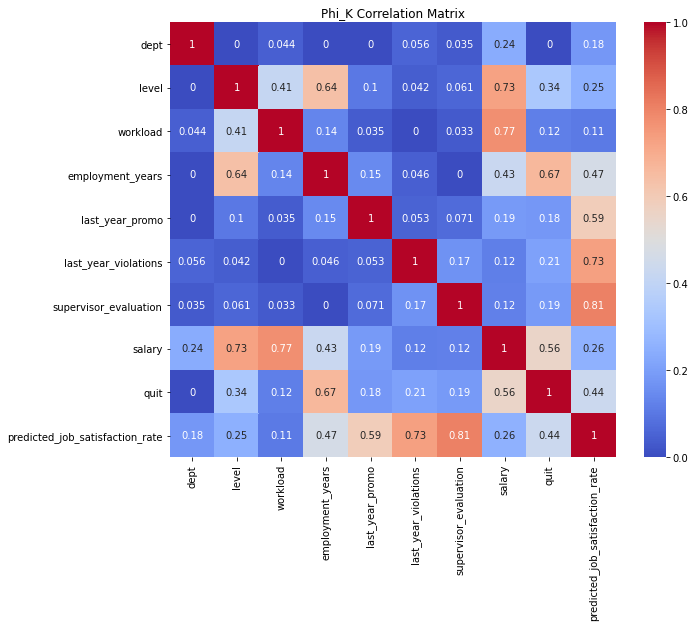

In [53]:
#Phi_K correlation

corr_matrix = train_q.phik_matrix(
    interval_cols=['employment_years', 
    'supervisor_evaluation', 
    'salary', 'predicted_job_satisfaction_rate']
)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Phi_K Correlation Matrix')
plt.show()

`На увольнение (quit)` сильнее всего влияют `стаж (employment_years)`, `зарплата (salary)` и `предсказанная удовлетворённость работой (predicted_job_satisfaction_rate)`. 

Предсказанный уровень удовлетворённости тесно связан с `оценкой руководителя (supervisor_evaluation) и нарушениями (last_year_violations)`. `Зарплата`, в свою очередь, сильно коррелирует с `уровнем должности (level) и загруженностью (workload)`. 

*Таким образом, ключевые факторы, связанные с уходом сотрудника, — это опыт, материальные условия и общее отношение к работе, отражённое в предсказанной удовлетворённости.*

## Подготовка данных

Подготовьте признаки так же, как и в первой задаче: выполните подготовку в пайплайне, дополнив пайплайн предобработки. При кодировании учитывайте особенности признаков и моделей и используйте как минимум два кодировщика.

In [54]:
# Подготовка данных 

encoder = LabelEncoder()

X_train = train_q.copy()
X_train = train_q.drop('quit', axis=1)
y_train = encoder.fit_transform(train_q['quit'])


# Обновление тестовых данных
X_test = test_q.copy()
X_test = test_q.drop('quit', axis=1)
y_test = encoder.transform(test_q['quit'])

display(X_test.shape)
display(y_test.shape)
display(test_q.shape)

display(dict(enumerate(encoder.classes_)))

(2000, 9)

(2000,)

(2000, 10)

{0: 'no', 1: 'yes'}

Целевой признак: 0 = no, 1 = yes

In [55]:
# Обновляем списки признаков

num_columns = [
    'employment_years', 
    'supervisor_evaluation', 
    'salary',
    'predicted_job_satisfaction_rate'
]
ohe_columns = [
    'last_year_promo', 
    'last_year_violations', 
    'dept'
]
ord_columns = [
    'workload', 
    'level'
]


In [56]:
# Создаём пайплайн для подготовки признаков из списка ohe_columns

ohe_pipe = Pipeline(
    [
        ('simpleImputer_ohe_1', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
        ('simpleImputer_ohe_2', SimpleImputer(missing_values=' ', strategy='most_frequent')),
        ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore'))
    ]
)

# Создаём пайплайн для подготовки признаков из списка ord_columns

ord_pipe = Pipeline(
    [
        ('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
        ('ord', OrdinalEncoder(
            categories=[
                ['medium', 'high', 'low'],
                ['junior', 'middle', 'sinior'],
            ],
            handle_unknown='use_encoded_value', unknown_value=np.nan
        )), 
        ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)

# Общий пайплайн для подготовки данных

data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_columns),
        ('ord', ord_pipe, ord_columns),
        ('num', StandardScaler(), num_columns)
    ], 
    remainder='passthrough'
)

In [57]:
# Пайплайн с моделью
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('model', DecisionTreeClassifier(random_state=42))  # Базовая модель
])

## Обучение модели

**Обучите как минимум три модели. Как минимум для двух из них подберите гиперпараметры. Проверьте качество лучшей модели.
Метрика оценки качества в этой задаче — ROC-AUC. Критерий успеха: ROC-AUC ≥ 0.91 на тестовой выборке. Напомним: отбор признаков часто помогает улучшить метрику.**

In [58]:
# Сетка гиперпараметров
param_grid = [
    # DecisionTreeClassifier
    {
        'model': [DecisionTreeClassifier(random_state=42)],
        'model__max_depth': range(2, 11),
        'model__min_samples_split': range(2, 11),
        'model__min_samples_leaf': range(1, 11),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']
    },
    # LogisticRegression
    {
        'model': [LogisticRegression(random_state=42)],
        'model__C': [0.1, 1, 10, 100],
        'model__penalty': ['l2', 'none'],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']
    },
    # RandomForestClassifier
    {
        'model': [RandomForestClassifier(random_state=42)],
        'model__n_estimators': range(50, 201, 50),
        'model__max_depth': range(5, 21, 5),
        'model__min_samples_split': range(2, 11),
        'model__min_samples_leaf': range(1, 11),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']
    }
]

In [59]:
# Определение метрики ROC-AUC

scorer = make_scorer(roc_auc_score, needs_proba=True)

# RandomizedSearchCV для поиска гиперпараметров

randomized_search = RandomizedSearchCV(
    pipe_final,
    param_distributions=param_grid,
    scoring=scorer,
    cv=5,
    n_jobs=-1,
    random_state=42
)

/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_scorer.py:610: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


In [60]:
# Обучение моделей

randomized_search.fit(X_train, y_train)

# Лучшая модель

best_model = randomized_search.best_estimator_
best_params = randomized_search.best_params_
best_score = randomized_search.best_score_

# Оценка на тестовой выборке

y_pred_proba = best_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Лучшие параметры модели: {best_params}")
print(f"ROC-AUC на тестовой выборке: {roc_auc:.3f}")

# Проверка первых 5 строк предсказаний

print(f"Первые вероятности: {y_pred_proba[:5]}")


Лучшие параметры модели: {'preprocessor__num': RobustScaler(), 'model__n_estimators': 200, 'model__min_samples_split': 8, 'model__min_samples_leaf': 8, 'model__max_depth': 15, 'model': RandomForestClassifier(random_state=42)}
ROC-AUC на тестовой выборке: 0.927
Первые вероятности: [0.17013477 0.27194468 0.15579293 0.09376966 0.03580985]


## Выводы

**Сделайте промежуточные выводы о том, какая модель справилась лучше и почему.**

- **Лучшая модель:** RandomForestClassifier.
- Модель показала значение метрики **ROC-AUC** = 0.927 на тестовой выборке.

- RandomForestClassifier способен эффективно обрабатывать данные с нелинейными взаимосвязями между признаками.
- За счёт ансамблирования множества деревьев решений модель устойчива к переобучению и выбросам.
- Использование RobustScaler для числовых данных улучшило результаты за счёт обработки выбросов.

# Общий вывод

**Сформулируйте общий вывод:**
- опишите задачу;
- опишите все этапы работы;
- добавьте выводы и дополнительные предложения для бизнеса.

**Описание задачи:**

- В рамках проекта было поставлено две основные задачи. **Первая** — предсказать уровень удовлетворённости работой `job_satisfaction_rate` сотрудников, основываясь на имеющихся данных о них. **Вторая** — предсказать вероятность увольнения (quit) сотрудника из компании, используя признаки из первой части, а также дополнительно добавленный предсказанный признак «предсказанная удовлетворённость» `predicted_job_satisfaction_rate`.

- *Целью первой задачи было получить точную модель для прогноза уровня удовлетворённости сотрудника.* Критерием качества выступала метрика **SMAPE**, а успехом считалось достижение **SMAPE ≤ 15** на тестовой выборке. Во второй задаче требовалось предсказать уход сотрудника (классификационная задача), а метрикой успеха выступала **ROC-AUC** не ниже **0.91**.

**Краткое описание этапов работы:**

*Загрузка данных и первичное исследование:*
- Для обеих задач были загружены тренировочные и тестовые данные. Проверили их на соответствие описанию, наличие пропусков и дубликатов.

*Предобработка данных:*
- В первой задаче удалили дубликаты, заполнили пропуски в числовых признаках средним, а в категориальных — наиболее часто встречающимся значением. Привели данные к единому формату.

- Во второй задаче также удалили дубликаты и применили аналогичную стратегию обработки пропусков.

- Для кодирования категориальных признаков использовались `OneHotEncoder и OrdinalEncoder`. Числовые признаки масштабировались с помощью `StandardScaler, MinMaxScaler или RobustScaler` в зависимости от лучших результатов при подборе параметров.

*Исследовательский анализ данных (EDA):*
- В первой задаче были изучены распределения стажа, зарплат, нагрузки, повышений, дисциплинарных нарушений, отделов и уровня удовлетворённости. Сделан вывод, что уровень удовлетворённости персонала в среднем средний (около 0.5–0.6).

- Во второй задаче (связано с увольнениями) анализ показал, что сотрудники, у которых низкий уровень удовлетворённости, чаще увольняются. Также выявлено, что более высокие зарплаты и вовлечённость (высокая нагрузка) ассоциируются с меньшей вероятностью ухода.

*Создание и добавление нового признака:*
- По результатам первой задачи был предсказан признак `predicted_job_satisfaction_rate` для данных второй задачи. Таким образом, во второй задаче использовали дополнительный входной признак, улучшивший качество предсказаний.

*Обучение моделей и подбор гиперпараметров (Первая задача):*
- Была исследована линейная регрессия `LinearRegression`, дерево решений `DecisionTreeRegressor` и случайный лес `RandomForestRegressor`. Подбор гиперпараметров с помощью `RandomizedSearchCV` позволил найти лучшие настройки модели `RandomForestRegressor`, которая показала **SMAPE ≈14.84**, что ниже целевого порога 15. Значит, критерий успеха в первой задаче достигнут.

*Обучение моделей и подбор гиперпараметров (Вторая задача):*
- Для задачи классификации (увольнение) рассматривались `DecisionTreeClassifier, LogisticRegression и RandomForestClassifier`. Лучшие результаты показал `RandomForestClassifier` с подобранными гиперпараметрами и масштабированием признаков `RobustScaler`. Достигнута **ROC-AUC ≈0.927**, что выше требуемого уровня 0.91. Таким образом, цель второй задачи также достигнута.

**Выводы:**

**Первая задача:** Ключевым фактором для точного прогноза уровня удовлетворённости стал правильный выбор модели `RandomForestRegressor` и гиперпараметров, а также корректная предобработка и устранение дубликатов и пропусков.

**Вторая задача:** Добавление предсказанного признака удовлетворённости повысило качество предсказаний по увольнениям. Лучший результат показала модель `RandomForestClassifier`, достигнув высоких значений **ROC-AUC**.


**Дополнительные предложения для бизнеса:**

- Использовать предсказание уровня удовлетворённости для раннего выявления сотрудников, которые могут со временем покинуть компанию. Это позволит вовремя предложить им дополнительные мотивационные программы, повышения или улучшения условий труда.

- Ориентироваться на полученные инсайты: например, низкая зарплата и низкая удовлетворённость коррелируют с повышенным риском увольнения. Повышение вовлечённости (возможно, через более интересные задачи или программы развития) снизит отток кадров.

- Рассмотреть пересмотр подходов к повышению сотрудников (сейчас очень небольшой процент повышений за год): возможно, частичное повышение мотивации через более частые пересмотры должностей и поощрения повысит общую удовлетворённость и снизит текучесть.

**Итог:**
- Обе задачи успешно решены. Достигнуты целевые метрики для предсказания уровня удовлетворённости **SMAPE ≤ 15** и для предсказания увольнений **ROC-AUC ≥ 0.91**. Полученные инсайты помогут HR-отделу и руководителям улучшить условия работы и удержать наиболее ценных сотрудников, заранее предвидя потенциальные увольнения.